### GOAL: 
**classifying handwritten digits using a simple neural network (ANN) first and than repeating same thing with convolutional neural network.**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import models, datasets, layers

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

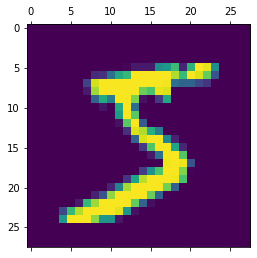

In [49]:
plt.matshow(X_train[0])

In [12]:
X_train.max()

255

In [14]:
X_test.max()

255

### Normalizing the data

In [15]:
X_train = X_train/255
X_test = X_test/255

In [51]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [20]:
ann_model = models.Sequential([
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

ann_model.compile(optimizer = 'adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = 'accuracy')

In [21]:
ann_model.fit(X_train,y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 37s 17ms/step - loss: 0.1931 - accuracy: 0.9418 - val_loss: 0.0905 - val_accuracy: 0.9715
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0787 - accuracy: 0.9758 - val_loss: 0.0826 - val_accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0561 - accuracy: 0.9823 - val_loss: 0.0751 - val_accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0403 - accuracy: 0.9865 - val_loss: 0.0756 - val_accuracy: 0.9780
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0323 - accuracy: 0.9892 - val_loss: 0.0922 - val_accuracy: 0.9752
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.0800 - val_accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0759 -

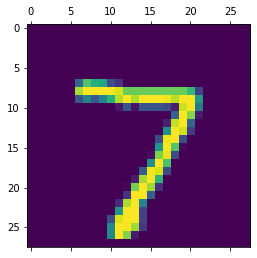

In [23]:
plt.matshow(X_test[0])

In [24]:
y_pred = ann_model.predict(X_test)
y_pred = [np.argmax(element) for element in y_pred]
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


[7, 2, 1, 0, 4]

In [25]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [35]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

### Now using CNN

In [36]:
cnn_model = models.Sequential([
    layers.Conv2D(filters = 28,activation = 'relu', kernel_size = (3,3),input_shape = (28,28,1)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters = 64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(10, activation = 'sigmoid')
])

In [37]:
cnn_model.compile(optimizer = 'adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = 'accuracy')

In [38]:
cnn_model.fit(X_train,y_train, epochs = 5, validation_data = (X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 112s 58ms/step - loss: 0.1576 - accuracy: 0.9535 - val_loss: 0.0548 - val_accuracy: 0.9834
Epoch 2/5
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0416 - val_accuracy: 0.9862
Epoch 3/5
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0363 - val_accuracy: 0.9873
Epoch 4/5
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0359 - val_accuracy: 0.9880
Epoch 5/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0368 - val_accuracy: 0.9891


<AxesSubplot:>

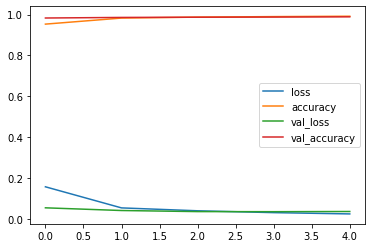

In [40]:
losses = pd.DataFrame(cnn_model.history.history)
losses.plot()

In [43]:
y_pred = cnn_model.predict(X_test)
y_pred = [np.argmax(element) for element in y_pred]
y_pred[:15]

313/313 [==============================] - 7s 21ms/step


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1]

In [44]:
y_test[:15]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1], dtype=uint8)

__Very good accuracy.__